## Time Series Encoder-Decoder

In [1]:
# DAL ToolBox
# version 1.0.777

source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox/main/jupyter.R")

#loading DAL
load_library("daltoolbox")

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform




### Series for studying

In [2]:
data(sin_data)
sin_data$y[39] <- sin_data$y[39]*6

In [3]:
sw_size <- 5
ts <- ts_data(sin_data$y, sw_size)
ts_head(ts, 3)

t4,t3,t2,t1,t0
0.0000000,0.2474040,0.4794255,0.6816388,0.8414710
0.2474040,0.4794255,0.6816388,0.8414710,0.9489846
0.4794255,0.6816388,0.8414710,0.9489846,0.9974950


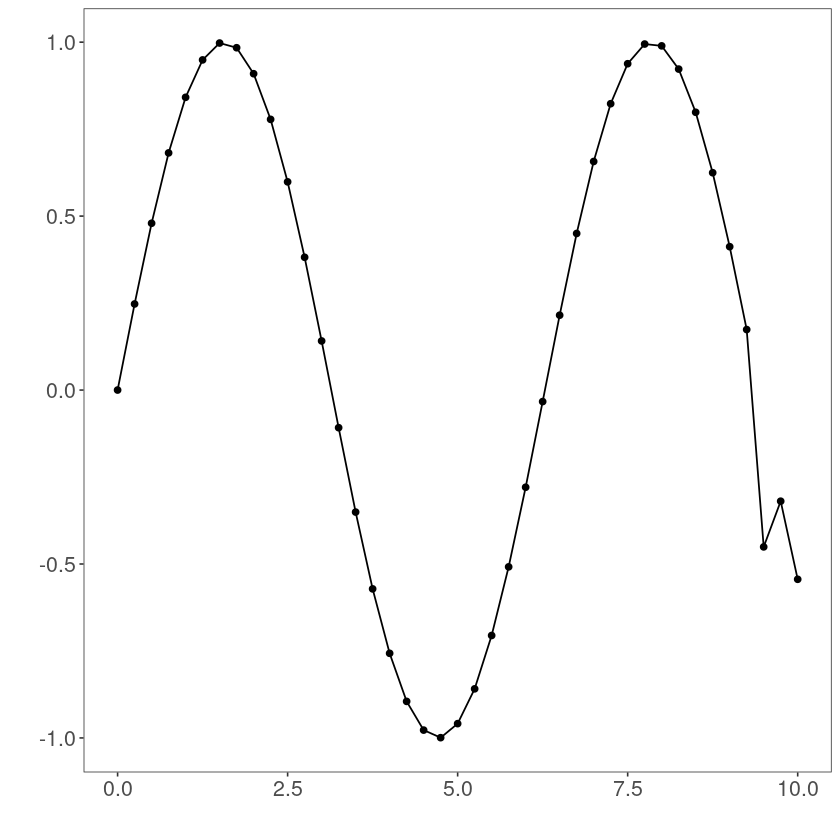

In [4]:
library(ggplot2)
plot_ts(x=sin_data$x, y=sin_data$y) + theme(text = element_text(size=16))

### data sampling

In [5]:
samp <- ts_sample(ts, test_size = 5)
train <- as.data.frame(samp$train)
test <- as.data.frame(samp$test)

### Model training

In [6]:
auto <- autoenc_encode_decode(5, 3)
auto <- fit(auto, train)

### Evaluation of encoding

In [7]:
print(head(train))
result <- transform(auto, train)
print(head(result))


         t4        t3        t2        t1        t0
1 0.0000000 0.2474040 0.4794255 0.6816388 0.8414710
2 0.2474040 0.4794255 0.6816388 0.8414710 0.9489846
3 0.4794255 0.6816388 0.8414710 0.9489846 0.9974950
4 0.6816388 0.8414710 0.9489846 0.9974950 0.9839859
5 0.8414710 0.9489846 0.9974950 0.9839859 0.9092974
6 0.9489846 0.9974950 0.9839859 0.9092974 0.7780732
            [,1]      [,2]      [,3]      [,4]      [,5]
[1,] 0.003327958 0.2499918 0.4766513 0.6774157 0.8408346
[2,] 0.247166067 0.4790465 0.6850584 0.8439181 0.9476732
[3,] 0.479088187 0.6807366 0.8400185 0.9514573 0.9989449
[4,] 0.682266116 0.8422987 0.9481642 0.9977344 0.9822428
[5,] 0.840431452 0.9484243 0.9959322 0.9790953 0.9038103
[6,] 0.948888302 0.9990231 0.9894952 0.9115024 0.7850842


### Encoding of test

In [8]:
print(head(test))
result <- transform(auto, test)
print(head(result))


         t4        t3         t2         t1         t0
1 0.9893582 0.9226042  0.7984871  0.6247240  0.4121185
2 0.9226042 0.7984871  0.6247240  0.4121185  0.1738895
3 0.7984871 0.6247240  0.4121185  0.1738895 -0.4509067
4 0.6247240 0.4121185  0.1738895 -0.4509067 -0.3195192
5 0.4121185 0.1738895 -0.4509067 -0.3195192 -0.5440211
          [,1]       [,2]        [,3]         [,4]       [,5]
[1,] 0.9892213 0.92573798  0.79371333  0.627364874  0.4046553
[2,] 0.9240762 0.80395943  0.61062199  0.414599001  0.1607111
[3,] 0.7913778 0.57604045  0.31866279 -0.007644102 -0.2965043
[4,] 0.5983816 0.36660910  0.09342699 -0.189925462 -0.4817598
[5,] 0.3060627 0.06082825 -0.21133141 -0.441142768 -0.6586043
